**Machine Learning Models for Anti-Money Laundering Detection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

In [3]:
df = pd.read_parquet('../data/Gold/features_engineered.parquet')
print(f" Dataloaded with: {df.shape}")

 Dataloaded with: (31898218, 32)


In [4]:

print(f"Laundering rate: {df['Is Laundering'].mean()*100:.4f}%")
print(f"\nColumns: {list(df.columns)}")

Laundering rate: 0.1104%

Columns: ['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', 'Is Laundering', 'hour', 'day_of_week', 'date', 'is_weekend', 'is_night', 'is_cross_currency', 'is_round_1000', 'is_round_100', 'is_ach', 'is_just_below_threshold', 'in_structuring_range', 'amount_zscore', 'account_prefix', 'is_bank_1004', 'is_bank_800', 'is_uk_pound', 'is_euro', 'is_usd', 'uk_pound_structuring', 'ach_weekend', 'risk_score_v2']


 Feature Selection & Preprocessing

- Statistical Tests for Feature Selection

In [5]:
from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import chi2, f_classif



categorical_features = []
numerical_features = []

exclude_cols = ['Is Laundering', 'Timestamp', 'Account', 'Account.1', 'date', 'account_prefix']

for col in df.columns:
    if col in exclude_cols:
        continue
    
    dtype = df[col].dtype
    
    if dtype == 'category' or dtype == 'object':
        categorical_features.append(col)
    elif dtype in ['int32', 'int64'] and df[col].nunique() <= 50: 
        categorical_features.append(col)
    elif dtype in ['float32', 'float64', 'int32', 'int64']:
        numerical_features.append(col)

In [6]:
print(f"\nDetected {len(categorical_features)} categorical features")
print(f"Detected {len(numerical_features)} numerical features")


Detected 21 categorical features
Detected 5 numerical features


In [ ]:
chi2_df = pd.DataFrame(chi2_results).sort_values('Chi2_Statistic', ascending=False)
chi2_df['Significance'] = chi2_df['P_Value'].apply(lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else ('*' if x < 0.05 else 'ns')))

print("Features Ranked by Chi-Squared Statistic")
chi2_df

In [ ]:
chi2_df = pd.DataFrame(chi2_results).sort_values('Chi2_Statistic', ascending=False)
chi2_df['Significance'] = chi2_df['P_Value'].apply(lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else ('*' if x < 0.05 else 'ns')))
chi2_df['Status'] = chi2_df['Feature'].apply(lambda x: 'INCLUDED' if x in feature_cols else 'EXCLUDED')

print("Features Ranked by Chi-Squared Statistic")
chi2_df

NameError: name 'feature_cols' is not defined

In [12]:

chi2_df = pd.DataFrame(chi2_results).sort_values('Chi2_Statistic', ascending=False)
chi2_df['Significance'] = chi2_df['P_Value'].apply(lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else ('*' if x < 0.05 else 'ns')))
chi2_df['Status'] = chi2_df['Feature'].apply(lambda x: 'INCLUDED' if x in feature_cols else 'EXCLUDED')

print("Features Ranked by Chi-Squared Statistic")
chi2_df

Features Ranked by Chi-Squared Statistic


,Feature,Data_Type,Chi2_Statistic,P_Value,Risk_Multiplier,Unique_Values,Significance,Status
20,risk_score_v2,int64,284328.0305,0.0000,inf,18,***,INCLUDED
2,Payment Format,category,186990.1700,0.0000,inf,7,***,EXCLUDED
10,is_ach,int64,186876.9346,0.0000,49.6834,2,***,INCLUDED
19,ach_weekend,int64,129306.1929,0.0000,21.6438,2,***,INCLUDED
4,day_of_week,int32,11237.6261,0.0000,4.1837,7,***,INCLUDED
5,is_weekend,int64,9321.8412,0.0000,3.0404,2,***,INCLUDED
3,hour,int32,5815.2662,0.0000,5.4902,24,***,INCLUDED
12,in_structuring_range,int64,5742.3435,0.0000,2.4372,2,***,INCLUDED
0,Receiving Currency,category,3471.3179,0.0000,4.5708,15,***,EXCLUDED
1,Payment Currency,category,3380.3441,0.0000,4.5154,15,***,EXCLUDED


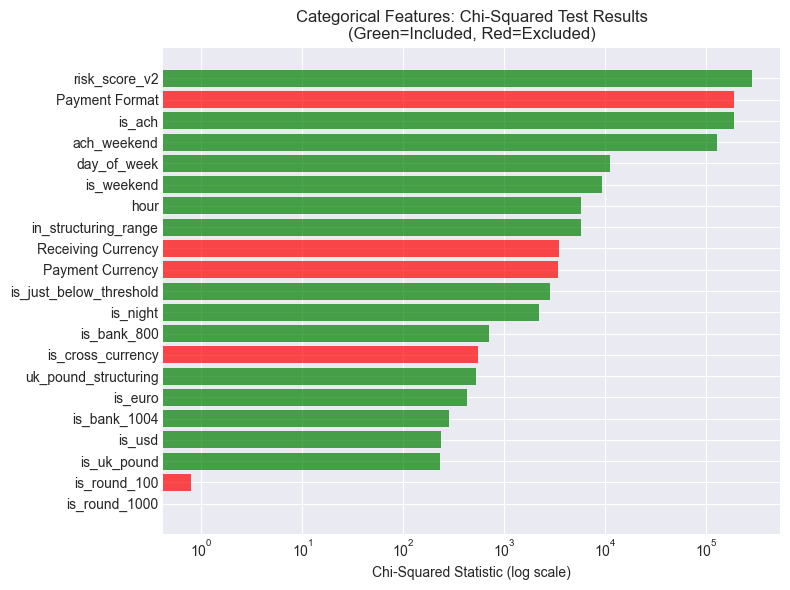

In [ ]:

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['green' if status == 'INCLUDED' else 'red' for status in chi2_df['Status']]
ax.barh(chi2_df['Feature'], chi2_df['Chi2_Statistic'], color=colors, alpha=0.7)
ax.set_xlabel('Chi-Squared Statistic (log scale)')
ax.set_title('Categorical Features: Chi-Squared Test Results\n(Green=Included, Red=Excluded)')
ax.set_xscale('log')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# ANOVA F-TESTS for all numerical featuers

anova_results = []

for feat in numerical_features:
    try:
        group_0 = df[df['Is Laundering'] == 0][feat].dropna()
        group_1 = df[df['Is Laundering'] == 1][feat].dropna()
        
        f_stat, p_value = f_oneway(group_0, group_1)
        
        mean_0 = group_0.mean()
        mean_1 = group_1.mean()
        
        anova_results.append({
            'Feature': feat,
            'Data_Type': str(df[feat].dtype),
            'F_Statistic': f_stat,
            'P_Value': p_value,
            'Mean_Normal': mean_0,
            'Mean_Laundering': mean_1,
            'Difference': mean_1 - mean_0
        })
    except Exception as e:
        print(f"  Warning: Could not test {feat}: {e}")

In [16]:

anova_df = pd.DataFrame(anova_results).sort_values('F_Statistic', ascending=False)
anova_df['Significance'] = anova_df['P_Value'].apply(lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else ('*' if x < 0.05 else 'ns')))
anova_df['Status'] = anova_df['Feature'].apply(lambda x: 'INCLUDED' if x in feature_cols else 'EXCLUDED')

print("Numerical Features Ranked by F-Statistic:")
anova_df

Numerical Features Ranked by F-Statistic:


,Feature,Data_Type,F_Statistic,P_Value,Mean_Normal,Mean_Laundering,Difference,Significance,Status
1,To Bank,int32,3316.8842,0.0000,409541.3952,208554.1628,-200987.2324,***,INCLUDED
0,From Bank,int32,1673.5234,0.0000,294557.5883,160378.2840,-134179.3043,***,INCLUDED
3,Amount Paid,float32,24.4845,0.0000,4363706.0000,53116740.0000,48753032.0000,***,INCLUDED
4,amount_zscore,float32,24.4844,0.0000,-0.0000,0.0263,0.0264,***,INCLUDED
2,Amount Received,float32,11.4352,0.0007,6379509.5000,53116740.0000,46737232.0000,***,INCLUDED


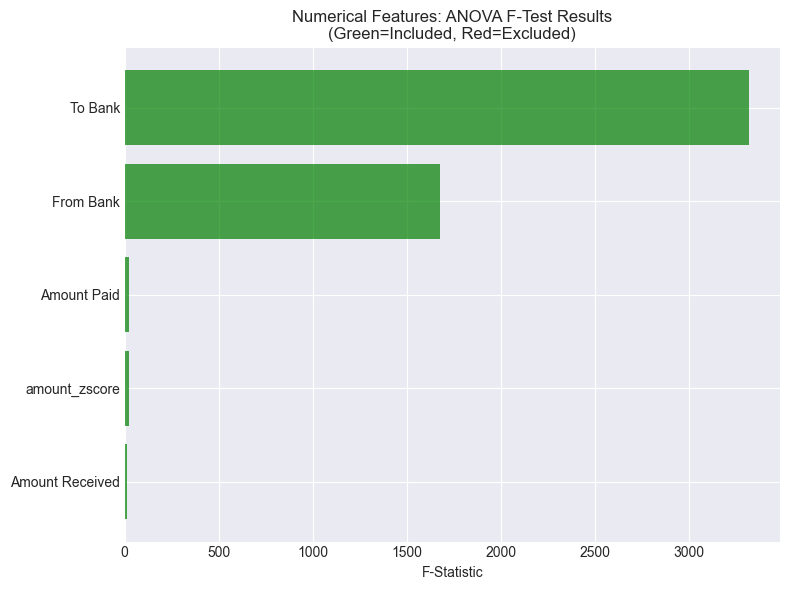

In [17]:

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['green' if status == 'INCLUDED' else 'red' for status in anova_df['Status']]
ax.barh(anova_df['Feature'], anova_df['F_Statistic'], color=colors, alpha=0.7)
ax.set_xlabel('F-Statistic')
ax.set_title('Numerical Features: ANOVA F-Test Results\n(Green=Included, Red=Excluded)')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [18]:

# excluded features with reasons
excluded_features = {
    'is_round_1000': 'Weak signal (low Chi2)',
    'is_round_100': 'Weak signal (low Chi2)',
    'Payment Format': 'Redundant (encoded as is_ach)',
    'Receiving Currency': 'Redundant (encoded as currency flags)',
    'Payment Currency': 'Redundant (encoded as currency flags)',
}

justification_data = []
for feat, reason in excluded_features.items():
    if feat in chi2_df['Feature'].values:
        row = chi2_df[chi2_df['Feature'] == feat].iloc[0]
        justification_data.append({
            'Feature': feat,
            'Data_Type': row['Data_Type'],
            'Chi2_Statistic': row['Chi2_Statistic'],
            'P_Value': row['P_Value'],
            'Risk_Multiplier': row['Risk_Multiplier'],
            'Reason_Excluded': reason
        })

justification_df = pd.DataFrame(justification_data)
print("Excluded Features with Statistical Evidence:")
justification_df

Excluded Features with Statistical Evidence:


,Feature,Data_Type,Chi2_Statistic,P_Value,Risk_Multiplier,Reason_Excluded
0,is_round_1000,int64,0.0000,1.0000,0.9627,Weak signal (low Chi2)
1,is_round_100,int64,0.7966,0.3721,1.2549,Weak signal (low Chi2)
2,Payment Format,category,186990.1700,0.0000,inf,Redundant (encoded as is_ach)
3,Receiving Currency,category,3471.3179,0.0000,4.5708,Redundant (encoded as currency flags)
4,Payment Currency,category,3380.3441,0.0000,4.5154,Redundant (encoded as currency flags)


In [23]:

# threshold analysis

chi2_threshold = 1000
f_threshold = 100

weak_categorical = chi2_df[chi2_df['Chi2_Statistic'] < chi2_threshold]
weak_numerical = anova_df[anova_df['F_Statistic'] < f_threshold]

print(f"Categorical features below Chi2 threshold ({chi2_threshold:,}):")
if len(weak_categorical) > 0:
    for _, row in weak_categorical.iterrows():
        status = " EXCLUDED" if row['Status'] == 'EXCLUDED' else " INCLUDED"
        print(f"  {row['Feature']} ({row['Data_Type']}): Chi2={row['Chi2_Statistic']:.2f} - {status}")
else:
    print("  None - all categorical features are strong")



Categorical features below Chi2 threshold (1,000):
  is_bank_800 (int64): Chi2=705.71 -  INCLUDED
  is_cross_currency (int64): Chi2=543.67 -  EXCLUDED
  uk_pound_structuring (int64): Chi2=521.74 -  INCLUDED
  is_euro (int64): Chi2=426.83 -  INCLUDED
  is_bank_1004 (int64): Chi2=285.30 -  INCLUDED
  is_usd (int64): Chi2=233.92 -  INCLUDED
  is_uk_pound (int64): Chi2=233.07 -  INCLUDED
  is_round_100 (int64): Chi2=0.80 -  EXCLUDED
  is_round_1000 (int64): Chi2=0.00 -  EXCLUDED


In [24]:
print(f"Numerical features below F-statistic threshold ({f_threshold:,}):")
if len(weak_numerical) > 0:
    for _, row in weak_numerical.iterrows():
        status = "EXCLUDED" if row['Status'] == 'EXCLUDED' else " INCLUDED "
        print(f"  {row['Feature']} ({row['Data_Type']}): F={row['F_Statistic']:.2f} - {status}")
else:
    print("  None - all numerical features are strong")

Numerical features below F-statistic threshold (100):
  Amount Paid (float32): F=24.48 -  INCLUDED 
  amount_zscore (float32): F=24.48 -  INCLUDED 
  Amount Received (float32): F=11.44 -  INCLUDED 


## Train/Test Split (Time-Based)

In [25]:
# Select features for modeling
feature_cols = [
    'From Bank', 'To Bank',
    'Amount Received', 'Amount Paid', 'amount_zscore',
    'is_uk_pound', 'is_euro', 'is_usd',
    'hour', 'day_of_week', 'is_weekend', 'is_night',
    'is_ach', 
    'is_just_below_threshold', 'in_structuring_range', 
    'is_bank_1004', 'is_bank_800',
    'uk_pound_structuring', 'ach_weekend', 
    'risk_score_v2'
]

X = df[feature_cols]
y = df['Is Laundering']

print(f"Features: {len(feature_cols)}")
print(f"Samples: {len(X):,}")
print(f"\nClass distribution:")
print(y.value_counts())

Features: 20
Samples: 31,898,218

Class distribution:
Is Laundering
0    31862988
1       35230
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Time-based split: Sort by timestamp, use earliest 80% for training
# Note: Timestamp is NOT in feature_cols, but we use it for splitting
df_sorted = df.sort_values('Timestamp').reset_index(drop=True)

# Calculate split index
split_idx = int(len(df_sorted) * 0.8)

# Split data (Timestamp used for ordering, not as a feature)
train_df = df_sorted.iloc[:split_idx]
test_df = df_sorted.iloc[split_idx:]

X_train = train_df[feature_cols]
y_train = train_df['Is Laundering']
X_test = test_df[feature_cols]
y_test = test_df['Is Laundering']

print(f"Training set: {X_train.shape}")
print(f"  Time range: {train_df['Timestamp'].min()} to {train_df['Timestamp'].max()}")
print(f"  Laundering rate: {y_train.mean()*100:.4f}%")

print(f"\nTest set: {X_test.shape}")
print(f"  Time range: {test_df['Timestamp'].min()} to {test_df['Timestamp'].max()}")
print(f"  Laundering rate: {y_test.mean()*100:.4f}%")

print(f"\nTrain class distribution:")
print(y_train.value_counts())
print(f"\nTest class distribution:")
print(y_test.value_counts())

print(f"\n✓ Data split complete (time-based)")
print(f"  Note: Timestamp used for temporal ordering only, not as a model feature")

## Model 1: XGBoost with Class Weighting

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Scale features BEFORE model training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to preserve feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)

print(f"✓ Features scaled using StandardScaler")
print(f"  Mean ≈ 0, Std ≈ 1 for all features\n")

# Calculate scale_pos_weight (ratio of negative to positive class)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale pos weight: {scale_pos_weight:.2f}\n")

# Training Model 1
model1 = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

model1.fit(X_train_scaled, y_train)

# Predictions
y_pred1 = model1.predict(X_test_scaled)
y_proba1 = model1.predict_proba(X_test_scaled)[:, 1]

print("\nModel 1: XGBoost with Class Weighting")
print("="*60)
print(classification_report(y_test, y_pred1))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred1):.4f}")
print(f"Precision: {precision_score(y_test, y_pred1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred1):.4f}")

## Model 2: SMOTE + XGBoost

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to UNSCALED data, then scale
smote = SMOTE(random_state=42, n_jobs=-1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set: {X_train.shape}")
print(f"SMOTE training set: {X_train_smote.shape}")
print(f"\nSMOTE class distribution:")
print(pd.Series(y_train_smote).value_counts())

# Scale AFTER SMOTE
scaler_smote = StandardScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_train_smote)
X_test_smote_scaled = scaler_smote.transform(X_test)

# Convert back to DataFrame
X_train_smote_scaled = pd.DataFrame(X_train_smote_scaled, columns=feature_cols)
X_test_smote_scaled = pd.DataFrame(X_test_smote_scaled, columns=feature_cols, index=X_test.index)

print(f"\n✓ SMOTE applied to unscaled data, then scaled")

# Training Model 2
model2 = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

model2.fit(X_train_smote_scaled, y_train_smote)

# Predictions
y_pred2 = model2.predict(X_test_smote_scaled)
y_proba2 = model2.predict_proba(X_test_smote_scaled)[:, 1]

print("\nModel 2: SMOTE + XGBoost")
print("="*60)
print(classification_report(y_test, y_pred2))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba2):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred2):.4f}")
print(f"Precision: {precision_score(y_test, y_pred2):.4f}")
print(f"Recall: {recall_score(y_test, y_pred2):.4f}")

## Model 3: Ensemble (XGBoost + LightGBM)

# Training LightGBM with same scaled data as Model 1
model3_lgbm = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

model3_lgbm.fit(X_train_scaled, y_train)

# Ensemble predictions (average probabilities from Model 1 and LightGBM)
y_proba3_xgb = model1.predict_proba(X_test_scaled)[:, 1]
y_proba3_lgbm = model3_lgbm.predict_proba(X_test_scaled)[:, 1]
y_proba3 = (y_proba3_xgb + y_proba3_lgbm) / 2
y_pred3 = (y_proba3 >= 0.5).astype(int)

print("\nModel 3: Ensemble (XGBoost + LightGBM)")
print("="*60)
print(classification_report(y_test, y_pred3))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba3):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred3):.4f}")
print(f"Precision: {precision_score(y_test, y_pred3):.4f}")
print(f"Recall: {recall_score(y_test, y_pred3):.4f}")

## Model Comparison

# Compare models with comprehensive metrics
results = pd.DataFrame({
    'Model': ['XGBoost (Class Weight)', 'SMOTE + XGBoost', 'Ensemble (XGB+LGBM)'],
    'F1 Score': [
        f1_score(y_test, y_pred1),
        f1_score(y_test, y_pred2),
        f1_score(y_test, y_pred3)
    ],
    'Precision': [
        precision_score(y_test, y_pred1),
        precision_score(y_test, y_pred2),
        precision_score(y_test, y_pred3)
    ],
    'Recall': [
        recall_score(y_test, y_pred1),
        recall_score(y_test, y_pred2),
        recall_score(y_test, y_pred3)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_proba1),
        roc_auc_score(y_test, y_proba2),
        roc_auc_score(y_test, y_proba3)
    ]
})

print("Model Comparison")
print("="*60)
display(results)

# Visualization
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

results.plot(x='Model', y='F1 Score', kind='bar', ax=ax[0,0], color='steelblue', legend=False)
ax[0,0].set_title('F1 Score Comparison')
ax[0,0].set_ylabel('F1 Score')
ax[0,0].set_xticklabels(results['Model'], rotation=45, ha='right')
ax[0,0].axhline(y=0.85, color='red', linestyle='--', label='Target: 0.85')
ax[0,0].legend()

results.plot(x='Model', y='Precision', kind='bar', ax=ax[0,1], color='coral', legend=False)
ax[0,1].set_title('Precision Comparison')
ax[0,1].set_ylabel('Precision')
ax[0,1].set_xticklabels(results['Model'], rotation=45, ha='right')
ax[0,1].axhline(y=0.80, color='red', linestyle='--', label='Target: 0.80')
ax[0,1].legend()

results.plot(x='Model', y='Recall', kind='bar', ax=ax[1,0], color='green', legend=False)
ax[1,0].set_title('Recall Comparison')
ax[1,0].set_ylabel('Recall')
ax[1,0].set_xticklabels(results['Model'], rotation=45, ha='right')
ax[1,0].axhline(y=0.90, color='red', linestyle='--', label='Target: 0.90')
ax[1,0].legend()

results.plot(x='Model', y='ROC-AUC', kind='bar', ax=ax[1,1], color='purple', legend=False)
ax[1,1].set_title('ROC-AUC Comparison')
ax[1,1].set_ylabel('ROC-AUC')
ax[1,1].set_xticklabels(results['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Confusion Matrix (Best Model)

# Training LightGBM with same scaled data as Model 1
model3_lgbm = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

model3_lgbm.fit(X_train_scaled, y_train)

# Ensemble predictions (average probabilities from Model 1 and LightGBM)
y_proba3_xgb = model1.predict_proba(X_test_scaled)[:, 1]
y_proba3_lgbm = model3_lgbm.predict_proba(X_test_scaled)[:, 1]
y_proba3 = (y_proba3_xgb + y_proba3_lgbm) / 2
y_pred3 = (y_proba3 >= 0.5).astype(int)

print("\nModel 3: Ensemble (XGBoost + LightGBM)")
print("="*60)
print(classification_report(y_test, y_pred3))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba3):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred3):.4f}")
print(f"Precision: {precision_score(y_test, y_pred3):.4f}")
print(f"Recall: {recall_score(y_test, y_pred3):.4f}")

## Feature Importance

In [ ]:
# Select best model (highest F1 score)
best_idx = results['F1 Score'].idxmax()
best_model_name = results.loc[best_idx, 'Model']
best_y_pred = [y_pred1, y_pred2, y_pred3][best_idx]

print(f"Best Model: {best_model_name}")
print("="*60)

# Confusion matrix
cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Laundering'],
            yticklabels=['Normal', 'Laundering'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Calculate metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives: {tn:,}")
print(f"False Positives: {fp:,}")
print(f"False Negatives: {fn:,}")
print(f"True Positives: {tp:,}")
print(f"\nPrecision: {tp/(tp+fp):.4f}")
print(f"Recall: {tp/(tp+fn):.4f}")
print(f"F1 Score: {2*tp/(2*tp+fp+fn):.4f}")

## Save Best Model

# Get feature importance from best model
if best_idx == 0:
    importance = model1.feature_importances_
elif best_idx == 1:
    importance = model2.feature_importances_
else:
    importance = (model1.feature_importances_ + model3_lgbm.feature_importances_) / 2

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features")
print("="*60)
display(feature_importance.head(15))

# Visualization
plt.figure(figsize=(10, 8))
plt.barh(feature_importance.head(15)['Feature'], feature_importance.head(15)['Importance'])
plt.xlabel('Importance')
plt.title(f'Top 15 Feature Importance - {best_model_name}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models/', exist_ok=True)

# Save best model
if best_idx == 0:
    best_model = model1
    best_scaler = scaler
elif best_idx == 1:
    best_model = model2
    best_scaler = scaler_smote
else:
    best_model = {'xgb': model1, 'lgbm': model3_lgbm}
    best_scaler = scaler

# Save model, scaler, and feature columns
joblib.dump(best_model, '../models/best_aml_model.pkl')
joblib.dump(best_scaler, '../models/scaler.pkl')
joblib.dump(feature_cols, '../models/feature_columns.pkl')

print(f"✓ Best model saved: {best_model_name}")
print(f"  F1 Score: {results.loc[best_idx, 'F1 Score']:.4f}")
print(f"  Precision: {results.loc[best_idx, 'Precision']:.4f}")
print(f"  Recall: {results.loc[best_idx, 'Recall']:.4f}")
print(f"  ROC-AUC: {results.loc[best_idx, 'ROC-AUC']:.4f}")
print(f"\n✓ Scaler saved for production deployment")
print(f"✓ Feature columns saved")
print("\n" + "="*60)
print("Modeling Complete ✓")
print("="*60)

In [ ]:
import joblib

# Save best model
if best_idx == 0:
    best_model = model1
elif best_idx == 1:
    best_model = model2
else:
    best_model = {'xgb': model1, 'lgbm': model3_lgbm}

joblib.dump(best_model, '../models/best_aml_model.pkl')
joblib.dump(feature_cols, '../models/feature_columns.pkl')

print(f"Best model saved: {best_model_name}")
print(f"F1 Score: {results.loc[best_idx, 'F1 Score']:.4f}")
print(f"ROC-AUC: {results.loc[best_idx, 'ROC-AUC']:.4f}")
print("\n" + "="*60)
print("Modeling Complete ✓")
print("="*60)